## Installing libraries and Dependencies

### Uncomment and run the following code block to install all required dependencies

In [1]:
# !pip install keras
# !pip install numpy
# !pip install gradio
# !pip install tensorflow
# !pip install matplotlib
# !pip install scikit-learn 
# !pip install opencv-python

## Importing libraries

In [2]:
import cv2
import os
import numpy as np

import gradio as gr

import matplotlib.pyplot as plt

import tensorflow as tf
from keras.optimizers import Adam
from keras.models import Sequential
 
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

from sklearn.metrics import classification_report

C:\ProgramData\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


## Defining the `get_data` function to get data from the directory

In [3]:
labels = ['red', 'black', 'geographic', 'normal', 'yellow'] # titles of subfolders
img_size = 120 # input image size

def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data, dtype=object)

## Defining training and validation directories

In [4]:
train = get_data('/Dr. Tongue/data/train')
val = get_data('/Dr. Tongue/data/test/')

## Generating the features and labels from the data and normalizing it

In [5]:
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in val:
  x_val.append(feature)
  y_val.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

## Data Augmentation

In [6]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(x_train)   

## Model Definition

In [7]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(120,120,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(5, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 120, 120, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 60, 60, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 64)        0

## Model Compilation

In [8]:
opt = Adam(learning_rate=0.0005)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

## Model fitting

In [9]:
history = model.fit(x_train,y_train, epochs = 25, validation_data = (x_val, y_val))

Epoch 1/25


C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\backend.py:4929: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


4/4 [==============================] - 37s 1s/step - loss: 1.6725 - accuracy: 0.1871 - val_loss: 1.5874 - val_accuracy: 0.2500
Epoch 2/25
4/4 [==============================] - 3s 779ms/step - loss: 1.5801 - accuracy: 0.3243 - val_loss: 1.5712 - val_accuracy: 0.4545
Epoch 3/25
4/4 [==============================] - 3s 741ms/step - loss: 1.5641 - accuracy: 0.4384 - val_loss: 1.5112 - val_accuracy: 0.5227
Epoch 4/25
4/4 [==============================] - 3s 750ms/step - loss: 1.4882 - accuracy: 0.5846 - val_loss: 1.4405 - val_accuracy: 0.5909
Epoch 5/25
4/4 [==============================] - 3s 743ms/step - loss: 1.3829 - accuracy: 0.7074 - val_loss: 1.2838 - val_accuracy: 0.6591
Epoch 6/25
4/4 [==============================] - 3s 735ms/step - loss: 1.2158 - accuracy: 0.6744 - val_loss: 1.1375 - val_accuracy: 0.5909
Epoch 7/25
4/4 [==============================] - 3s 749ms/step - loss: 1.0038 - accuracy: 0.7296 - val_loss: 0.9511 - val_accuracy: 0.7500
Epoch 8/25
4/4 [=================

## Plotting Model's accuracy and loss w.r.t. training and validation set

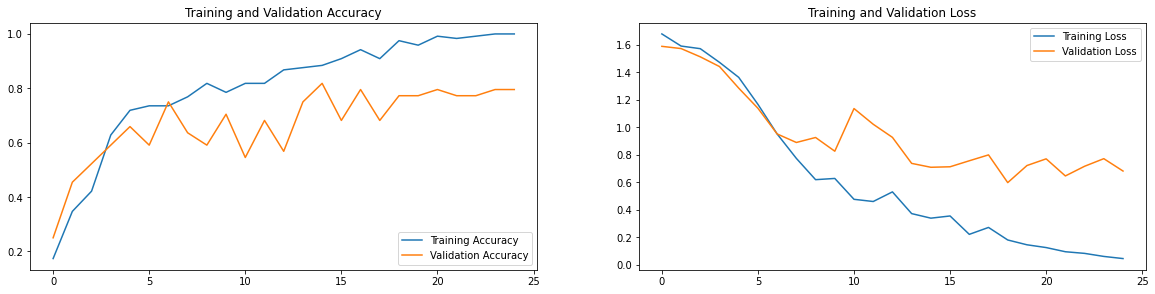

In [10]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(25)

plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Making predictions

In [11]:
predictions = model.predict_classes(x_val)
predictions = predictions.reshape(1,-1)[0]
print(classification_report(y_val, predictions, target_names = ['red (Class 0)','black (Class 1)', 'geographic (Class 2)', 'normal (Class 3)', 'yellow (Class 4)']))

C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


                      precision    recall  f1-score   support

       red (Class 0)       0.80      1.00      0.89         8
     black (Class 1)       0.91      0.91      0.91        11
geographic (Class 2)       1.00      0.44      0.62         9
    normal (Class 3)       0.55      0.75      0.63         8
    yellow (Class 4)       0.88      0.88      0.88         8

            accuracy                           0.80        44
           macro avg       0.83      0.80      0.78        44
        weighted avg       0.84      0.80      0.79        44



## Predicting using local web interface at `http://127.0.0.1:7860/`

In [12]:
def predict_image(img):
  img_4d=img.reshape(-1,120,120,3)
  prediction=model.predict(img_4d)[0]
  return {labels[i]: float(prediction[i]) for i in range(5)}

image = gr.inputs.Image(shape=(120,120))
label = gr.outputs.Label(num_top_classes=5)

gr.Interface(fn=predict_image, inputs=image, outputs=label,interpretation='default').launch(debug='True')

Running locally at: http://127.0.0.1:7860/
To create a public link, set `share=True` in `launch()`.
Interface loading below...


## **Note:**

### As can be observed, validation accuracy is lower than training accuracy, and validation loss is likewise higher than training loss. It's due to the fact that there's fewer data. By expanding the data set, accuracy may be improved and losses can be reduced.